# Project Global Tree Cover Loss

## Deforestation by Drivers

### Imports

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [77]:

file_path = 'drivers_clean.csv'

df_drivers_raw = pd.read_csv(file_path)

In [78]:
df_drivers_raw

,Unnamed: 0,country,threshold,driver,year,tc_loss_ha,area_ha,extent_2000_ha,extent_2010_ha
0,0,Afghanistan,30,Hard commodities,2014,0.00,"64,383,655.00","205,771.00","71,786.00"
1,1,Afghanistan,30,Logging,2001,3.00,"64,383,655.00","205,771.00","71,786.00"
2,2,Afghanistan,30,Logging,2002,64.00,"64,383,655.00","205,771.00","71,786.00"
3,3,Afghanistan,30,Logging,2003,73.00,"64,383,655.00","205,771.00","71,786.00"
4,4,Afghanistan,30,Logging,2004,143.00,"64,383,655.00","205,771.00","71,786.00"
...,...,...,...,...,...,...,...,...,...
21892,21892,Zimbabwe,30,Wildfire,2020,128.00,"39,004,305.00","1,411,915.00","1,059,391.00"
21893,21893,Zimbabwe,30,Wildfire,2021,89.00,"39,004,305.00","1,411,915.00","1,059,391.00"
21894,21894,Zimbabwe,30,Wildfire,2022,272.00,"39,004,305.00","1,411,915.00","1,059,391.00"
21895,21895,Zimbabwe,30,Wildfire,2023,143.00,"39,004,305.00","1,411,915.00","1,059,391.00"


In [79]:
df_drivers = df_drivers_raw.copy()

### EDA

In [80]:
df_drivers.shape

(21897, 9)

In [81]:
df_drivers.head()

,Unnamed: 0,country,threshold,driver,year,tc_loss_ha,area_ha,extent_2000_ha,extent_2010_ha
0,0,Afghanistan,30,Hard commodities,2014,0.00,"64,383,655.00","205,771.00","71,786.00"
1,1,Afghanistan,30,Logging,2001,3.00,"64,383,655.00","205,771.00","71,786.00"
2,2,Afghanistan,30,Logging,2002,64.00,"64,383,655.00","205,771.00","71,786.00"
3,3,Afghanistan,30,Logging,2003,73.00,"64,383,655.00","205,771.00","71,786.00"
4,4,Afghanistan,30,Logging,2004,143.00,"64,383,655.00","205,771.00","71,786.00"


In [82]:
df_drivers.isna().sum()

Unnamed: 0        0
country           0
threshold         0
driver            0
year              0
tc_loss_ha        0
area_ha           1
extent_2000_ha    1
extent_2010_ha    1
dtype: int64

In [83]:
df_drivers["threshold"].unique()

array([30], dtype=int64)

In [84]:
df_drivers.columns

Index(['Unnamed: 0', 'country', 'threshold', 'driver', 'year', 'tc_loss_ha',
       'area_ha', 'extent_2000_ha', 'extent_2010_ha'],
      dtype='object')

### Drivers dataframe prep for last decade

Identify the distribution of tree cover loss drivers across all countries for 2024

1. Keep only relevant columns ('country', 'driver', 'year', 'tc_loss_ha') 
2. Create a subset for df_drivers that include only years 2015 to 2024
3. Sum all tc_loss_ha by driver
4. Create donut-chart showing the total tree cover loss by driver


In [85]:
# Remove column "treshold"
df_drivers = df_drivers.drop(columns=["threshold", "area_ha", "extent_2000_ha", "extent_2010_ha"])

In [86]:
# Create new subset including 2015 to 2024
df_drivers_2015_2024 = df_drivers[df_drivers["year"].between(2015, 2024)]

In [87]:
# Summ all tree cover loss by driver (2015-2024)
tc_by_driver_2015_2024 = (df_drivers_2015_2024.groupby("driver", as_index=False)["tc_loss_ha"].sum())

In [88]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [89]:
tc_by_driver_2015_2024

,driver,tc_loss_ha
0,Hard commodities,"2,528,661.81"
1,Logging,"59,608,072.89"
2,Other natural disturbances,"3,947,883.02"
3,Permanent agriculture,"73,208,320.80"
4,Settlements & Infrastructure,"1,809,521.21"
5,Shifting cultivation,"30,937,184.36"
6,Wildfire,"86,640,129.24"


In [90]:
tc_by_driver_2015_2024 = tc_by_driver_2015_2024.sort_values("tc_loss_ha", ascending=False)

tc_by_driver_2015_2024

,driver,tc_loss_ha
6,Wildfire,"86,640,129.24"
3,Permanent agriculture,"73,208,320.80"
1,Logging,"59,608,072.89"
5,Shifting cultivation,"30,937,184.36"
2,Other natural disturbances,"3,947,883.02"
0,Hard commodities,"2,528,661.81"
4,Settlements & Infrastructure,"1,809,521.21"


### Drivers Donut Chart

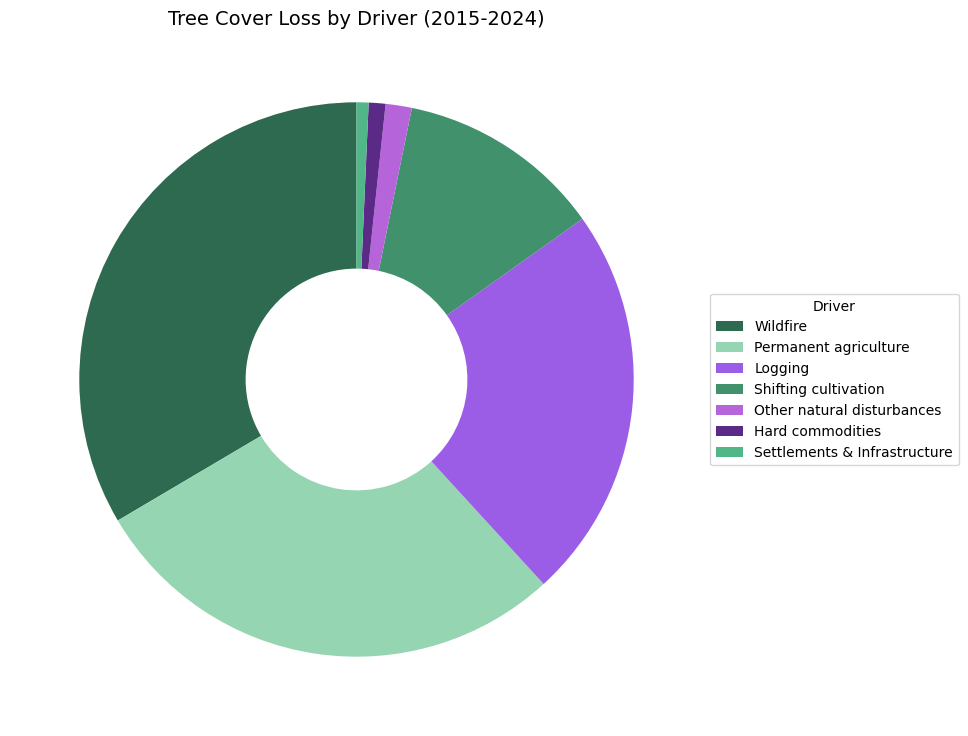

In [91]:
driver_colors = {
    "Hard commodities": "#5B2A86",              # deep purple
    "Logging": "#9B5DE5",                       # light purple
    "Other natural disturbances": "#B565D9",    # lavender
    "Permanent agriculture": "#95D5B2",         # light green
    "Settlements & Infrastructure": "#52B788",  # medium green
    "Shifting cultivation": "#40916C",          # muted green
    "Wildfire": "#2D6A4F",                      # dark green
}

colors = tc_by_driver_2015_2024["driver"].map(driver_colors)

fig, ax = plt.subplots(figsize=(9, 9))

colors = tc_by_driver_2015_2024["driver"].map(driver_colors)

wedges, _ = ax.pie(
    tc_by_driver_2015_2024["tc_loss_ha"],
    startangle=90,
    colors=colors,
    wedgeprops={"width": 0.6}
)

ax.legend(
    wedges,
    tc_by_driver_2015_2024["driver"],
    title="Driver",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

ax.set_title("Tree Cover Loss by Driver (2015-2024)", fontsize=14)

plt.show()


In [92]:
# Calculate percentages
total_loss = tc_by_driver_2015_2024["tc_loss_ha"].sum()
percentages = tc_by_driver_2015_2024["tc_loss_ha"] / total_loss * 100

In [93]:
percentages

6   33.49
3   28.30
1   23.04
5   11.96
2    1.53
0    0.98
4    0.70
Name: tc_loss_ha, dtype: float64

### Drivers data for last decade per year

After identifying the distribution of tree cover loss by driver for the last decade we now aim to get a full understanding of the tree cover loss by year as follows:

1. Select only relevant columns ('driver', 'year', 'tc_loss_ha')
2. Create a subset for df_drivers that include only years 2015 to 2024
3. Group by year and driver and get the sum of tree cover loss
4. Create a stacked bar chart per year

In [94]:
df_drivers

,Unnamed: 0,country,driver,year,tc_loss_ha
0,0,Afghanistan,Hard commodities,2014,0.00
1,1,Afghanistan,Logging,2001,3.00
2,2,Afghanistan,Logging,2002,64.00
3,3,Afghanistan,Logging,2003,73.00
4,4,Afghanistan,Logging,2004,143.00
...,...,...,...,...,...
21892,21892,Zimbabwe,Wildfire,2020,128.00
21893,21893,Zimbabwe,Wildfire,2021,89.00
21894,21894,Zimbabwe,Wildfire,2022,272.00
21895,21895,Zimbabwe,Wildfire,2023,143.00


In [95]:
df = df_drivers[["driver", "year", "tc_loss_ha"]].copy()

In [96]:
df_recent = df[df["year"].between(2015, 2024)]

In [97]:
df_grouped = df_recent.groupby(["year", "driver"], as_index=False)["tc_loss_ha"].sum()

In [98]:
df_pivot = df_grouped.pivot(index="year", columns="driver", values="tc_loss_ha")

In [99]:
df_pivot

driver,Hard commodities,Logging,Other natural disturbances,Permanent agriculture,Settlements & Infrastructure,Shifting cultivation,Wildfire
year,,,,,,,
2015,"196,091.80","5,086,169.53","189,669.37","6,042,886.10","143,097.90","2,634,940.05","5,270,016.25"
2016,"282,711.58","6,742,925.04","453,955.83","9,194,915.10","224,391.30","3,637,011.90","9,059,042.21"
2017,"291,258.86","6,968,556.05","932,376.46","9,242,363.19","252,621.84","3,884,065.98","7,642,519.82"
2018,"252,046.03","6,419,270.42","888,507.06","7,374,828.34","193,835.23","3,219,223.39","6,349,407.24"
2019,"236,476.92","6,213,615.10","266,512.66","6,851,695.51","176,994.80","2,974,126.79","7,404,449.64"
2020,"229,412.66","5,888,170.46","322,279.40","6,902,536.77","171,098.48","3,123,354.59","9,106,294.33"
2021,"225,128.37","5,900,306.74","211,847.21","6,674,686.61","165,454.52","2,785,309.87","9,255,838.59"
2022,"248,539.26","5,747,656.55","180,643.13","6,978,014.39","166,695.76","2,718,268.73","6,724,901.65"
2023,"312,453.94","5,389,113.43","203,644.01","7,197,149.50","157,646.50","3,004,376.22","11,953,027.50"


In [100]:
driver_order = df_pivot.sum().sort_values(ascending=False).index
df_pivot = df_pivot[driver_order]

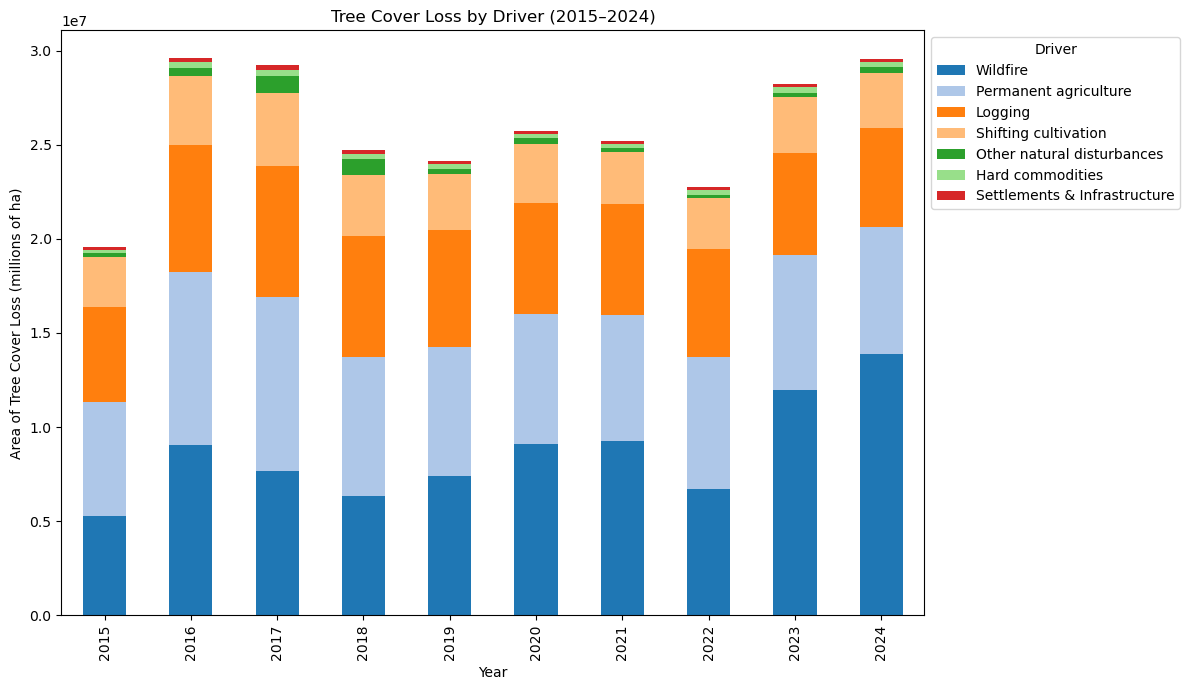

In [101]:
colors = plt.cm.tab20.colors

df_pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 7),
    color=colors[:len(df_pivot.columns)]
)

plt.ylabel("Area of Tree Cover Loss (millions of ha)")
plt.xlabel("Year")
plt.title("Tree Cover Loss by Driver (2015–2024)")
plt.legend(title="Driver", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

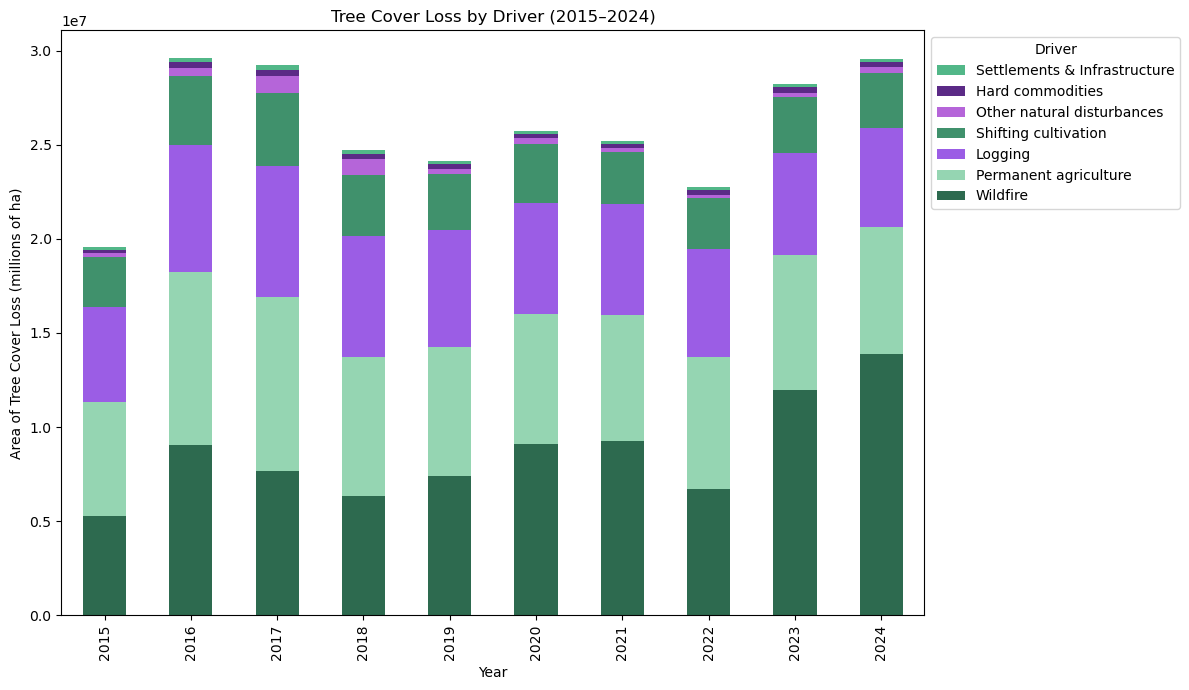

In [102]:
colors = [driver_colors[col] for col in df_pivot.columns]

ax = df_pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 7),
    color=colors
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1],  # reverse handles
    labels[::-1],   # reverse labels
    title="Driver",
    bbox_to_anchor=(1, 1)
)

plt.ylabel("Area of Tree Cover Loss (millions of ha)")
plt.xlabel("Year")
plt.title("Tree Cover Loss by Driver (2015–2024)")
plt.tight_layout()
plt.show()

### Identify the most impactful countries in tree cover loss

Based on the total amount of tree cover loss by country in the last decade, we aim to identify the one that contributed the most in total area lost to then understand what these countries have in common and identify the most impactful driver accross them.

Total tc_loss in the full data period by country and driver

In [103]:
df_drivers

,Unnamed: 0,country,driver,year,tc_loss_ha
0,0,Afghanistan,Hard commodities,2014,0.00
1,1,Afghanistan,Logging,2001,3.00
2,2,Afghanistan,Logging,2002,64.00
3,3,Afghanistan,Logging,2003,73.00
4,4,Afghanistan,Logging,2004,143.00
...,...,...,...,...,...
21892,21892,Zimbabwe,Wildfire,2020,128.00
21893,21893,Zimbabwe,Wildfire,2021,89.00
21894,21894,Zimbabwe,Wildfire,2022,272.00
21895,21895,Zimbabwe,Wildfire,2023,143.00


In [104]:
country_totals = df_drivers.groupby("country")["tc_loss_ha"].sum().sort_values(ascending=False)
country_totals

country
Russia          88,478,938.00
Brazil          73,138,399.00
Canada          62,490,060.00
United States   49,306,511.00
Indonesia       31,906,123.00
                     ...     
Jordan                   3.00
Palestine                3.00
Eritrea                  1.00
Malta                    0.00
Niger                    0.00
Name: tc_loss_ha, Length: 158, dtype: float64

In [105]:
total_loss = country_totals.sum()

country_pct = (country_totals / total_loss * 100).round(2)

In [106]:
country_pct.head(15)

country
Russia                             17.18
Brazil                             14.21
Canada                             12.14
United States                       9.58
Indonesia                           6.20
Democratic Republic of the Congo    4.08
China                               2.46
Bolivia                             1.89
Malaysia                            1.85
Australia                           1.79
Paraguay                            1.40
Argentina                           1.35
Sweden                              1.19
Colombia                            1.08
México                              1.01
Name: tc_loss_ha, dtype: float64

In [107]:
country_totals

country
Russia          88,478,938.00
Brazil          73,138,399.00
Canada          62,490,060.00
United States   49,306,511.00
Indonesia       31,906,123.00
                     ...     
Jordan                   3.00
Palestine                3.00
Eritrea                  1.00
Malta                    0.00
Niger                    0.00
Name: tc_loss_ha, Length: 158, dtype: float64

In [108]:
df_country_pct = country_pct.reset_index(name="pct")
df_country_pct.columns = ["country", "pct"]
df_country_pct

,country,pct
0,Russia,17.18
1,Brazil,14.21
2,Canada,12.14
3,United States,9.58
4,Indonesia,6.20
...,...,...
153,Jordan,0.00
154,Palestine,0.00
155,Eritrea,0.00
156,Malta,0.00


### Most impactful countries

In [109]:
countries_of_interest = [
    "Russia",
    "Brazil",
    "Canada",
    "United States",
    "Indonesia",
]

In [110]:
df_subset = df_drivers[
    df_drivers["country"].isin(countries_of_interest)
].copy()

In [111]:
df_subset = df_subset[df_subset["year"].between(2015, 2024)]

In [112]:
df_avg = (
    df_subset
    .groupby(["country", "driver"], as_index=False)["tc_loss_ha"]
    .mean()
)

In [113]:
df_avg

,country,driver,tc_loss_ha
0,Brazil,Hard commodities,"28,175.50"
1,Brazil,Logging,"248,788.10"
2,Brazil,Other natural disturbances,"44,285.30"
3,Brazil,Permanent agriculture,"2,199,721.60"
4,Brazil,Settlements & Infrastructure,"7,116.70"
5,Brazil,Shifting cultivation,"87,188.00"
6,Brazil,Wildfire,"835,211.50"
7,Canada,Hard commodities,"10,395.90"
8,Canada,Logging,"820,482.40"
9,Canada,Other natural disturbances,"25,830.20"


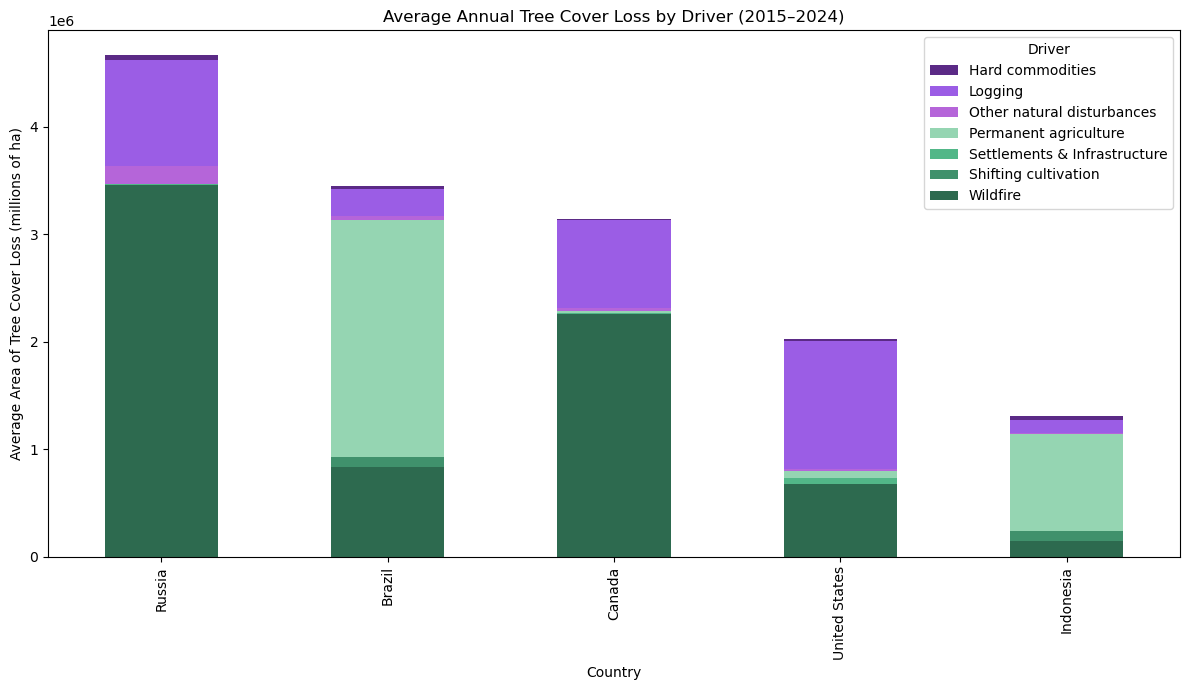

In [114]:
df_pivot = df_avg.pivot(
    index="country",
    columns="driver",
    values="tc_loss_ha"
)

country_order = [
    "Russia",
    "Brazil",
    "Canada",
    "United States",
    "Indonesia",
]

df_pivot = df_pivot.loc[country_order]

driver_order = [
    "Wildfire",
    "Shifting cultivation",
    "Settlements & Infrastructure",
    "Permanent agriculture",
    "Other natural disturbances",
    "Logging",
    "Hard commodities",
]

df_pivot = df_pivot[driver_order]

driver_colors = {
    "Hard commodities": "#5B2A86",
    "Logging": "#9B5DE5",
    "Other natural disturbances": "#B565D9",
    "Permanent agriculture": "#95D5B2",
    "Settlements & Infrastructure": "#52B788",
    "Shifting cultivation": "#40916C",
    "Wildfire": "#2D6A4F",
}

colors = [driver_colors[col] for col in df_pivot.columns]

ax = df_pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 7),
    color=colors
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1],
    labels[::-1],
    title="Driver",
    bbox_to_anchor=(1, 1)
)

plt.xlabel("Country")
plt.ylabel("Average Area of Tree Cover Loss (millions of ha)")
plt.title("Average Annual Tree Cover Loss by Driver (2015–2024)")
plt.tight_layout()
plt.show()

### Wildfires

In [115]:
df_drivers

,Unnamed: 0,country,driver,year,tc_loss_ha
0,0,Afghanistan,Hard commodities,2014,0.00
1,1,Afghanistan,Logging,2001,3.00
2,2,Afghanistan,Logging,2002,64.00
3,3,Afghanistan,Logging,2003,73.00
4,4,Afghanistan,Logging,2004,143.00
...,...,...,...,...,...
21892,21892,Zimbabwe,Wildfire,2020,128.00
21893,21893,Zimbabwe,Wildfire,2021,89.00
21894,21894,Zimbabwe,Wildfire,2022,272.00
21895,21895,Zimbabwe,Wildfire,2023,143.00


In [116]:
df_2015_2024 = df_drivers[(df_drivers["year"] >= 2015) & (df_drivers["year"] <= 2024)].copy()

In [117]:
df_wildfire = df_2015_2024[df_2015_2024["driver"] == "Wildfire"].copy()

In [118]:
wildfire_country_year_avg = (df_wildfire.groupby(["country", "year"], as_index=False)["tc_loss_ha"].mean())

In [119]:
wildfire_country_avg = (wildfire_country_year_avg.groupby("country", as_index=False)["tc_loss_ha"].mean())

In [120]:
top_5_countries = (wildfire_country_avg.sort_values("tc_loss_ha", ascending=False).head(5)["country"])

In [121]:
plot_df = wildfire_country_year_avg[wildfire_country_year_avg["country"].isin(top_5_countries)]

In [122]:
plot_df

,country,year,tc_loss_ha
47,Australia,2015,"187,301.00"
48,Australia,2016,"310,940.00"
49,Australia,2017,"134,930.00"
50,Australia,2018,"168,314.00"
51,Australia,2019,"1,565,317.00"
52,Australia,2020,"2,263,470.00"
53,Australia,2021,"192,986.00"
54,Australia,2022,"67,148.00"
55,Australia,2023,"149,672.00"
56,Australia,2024,"139,860.00"


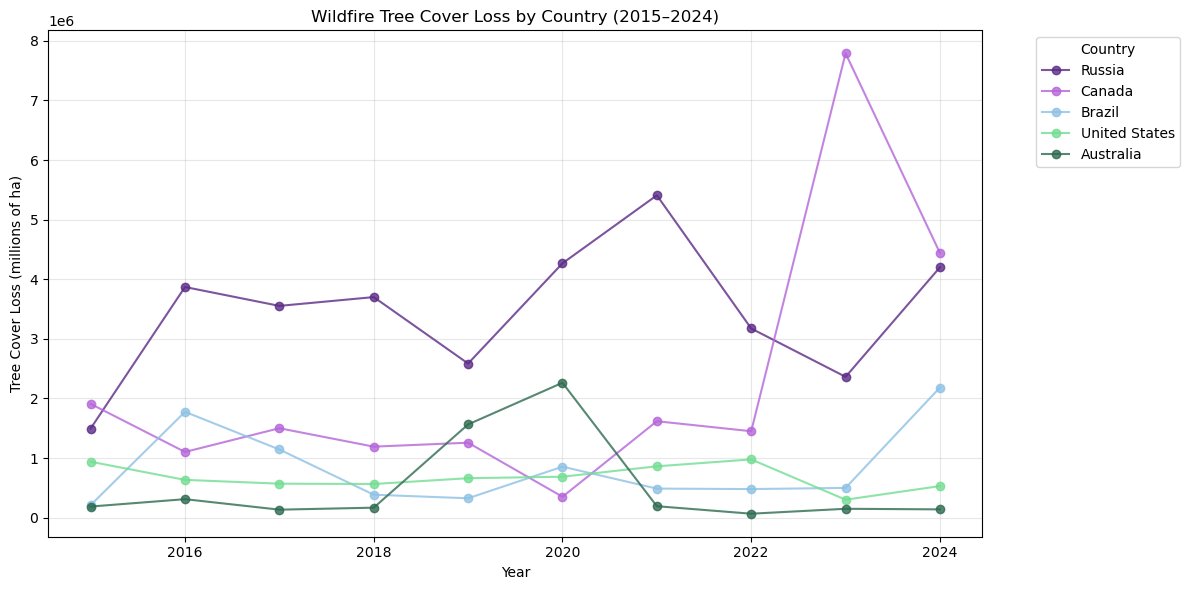

In [123]:
colors = ["#5B2A86", "#B565D9", "#8EC1E4", "#72DD92", "#2D6A4F"]

plt.figure(figsize=(12, 6))

# Loop through top 5 countries and assign a distinct color
for i, country in enumerate(top_5_countries):
    country_data = plot_df[plot_df["country"] == country]
    plt.plot(
        country_data["year"],
        country_data["tc_loss_ha"],
        marker="o",
        color=colors[i],
        alpha=0.8,
        label=country
    )

plt.title("Wildfire Tree Cover Loss by Country (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Tree Cover Loss (millions of ha)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()